In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
df = df[df['species'] == 'setosa']
df = df.drop(['species', 'petal_length', 'petal_width'], axis=1)
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


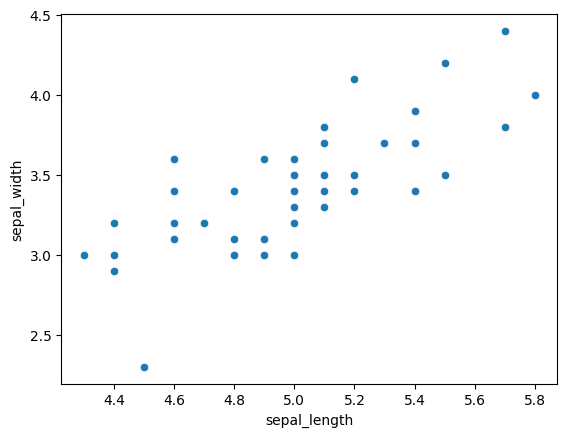

In [29]:
plt.figure()
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'])
plt.show()

In [30]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination=0.05, random_state=42)
clf.fit(df)

pred = clf.predict(df)

c:\Users\PC\Bcode\tensor\lib\site-packages\sklearn\ensemble\_iforest.py:307: UserWarning: max_samples (100) is greater than the total number of samples (50). max_samples will be set to n_samples for estimation.
  warn(


In [39]:
clf.decision_function(df)

array([ 0.22062538,  0.14524816,  0.16992411,  0.14158266,  0.19385527,
        0.13530857,  0.13511504,  0.22731837,  0.04793306,  0.17740165,
        0.1537428 ,  0.19149272,  0.16778774,  0.01590329, -0.01301178,
       -0.05229956,  0.13530857,  0.22062538,  0.04799674,  0.16510388,
        0.16574371,  0.17030956,  0.0851602 ,  0.18576816,  0.19149272,
        0.12000166,  0.22731837,  0.19317587,  0.19139198,  0.16992411,
        0.17654427,  0.16574371,  0.05472373,  0.0435276 ,  0.17740165,
        0.17892125,  0.12521933,  0.15593807,  0.10441469,  0.21881946,
        0.2209931 , -0.10408909,  0.07772905,  0.2209931 ,  0.16510388,
        0.16778774,  0.16510388,  0.15825128,  0.15051112,  0.20297897])

In [10]:
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [11]:
df['pred'] = pred

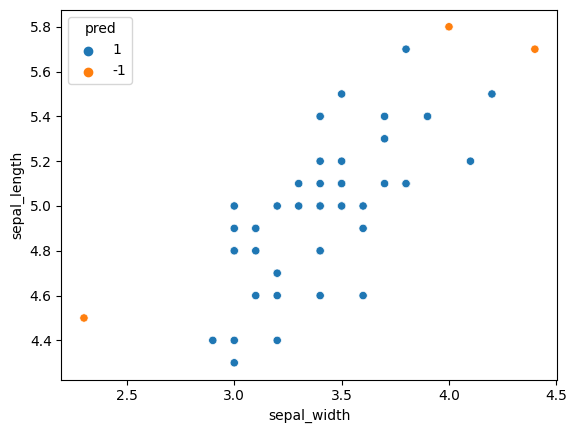

In [12]:
df['pred'] = pred.astype(str)

plt.figure()
sns.scatterplot(x=df['sepal_width'], y=df['sepal_length'], hue=df['pred'])
plt.show()

In [17]:
(df['pred']=='-1').sum()/df.shape[0]

0.06